In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

from neurodsp.plts import plot_time_series,  plot_power_spectra
from neurodsp.spectral import compute_spectrum
from neurodsp.utils.norm import normalize_sig

from fooof import FOOOF
from ndspflow.motif import Motif
from ndspflow.optimize import refit

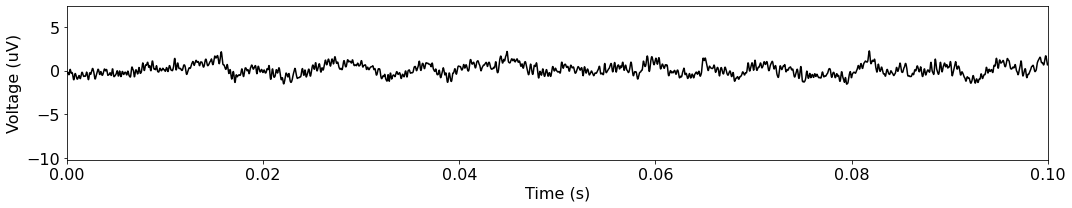

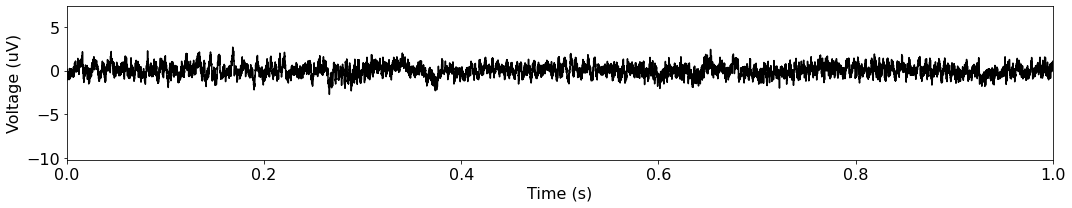

In [2]:
fs = 30000
sigs = np.load('data/160819_bank1.npy')

sig = sigs[0]
sig = normalize_sig(sig, mean=0, variance=1)

times = np.arange(0, len(sig)/fs, 1/fs)

plot_time_series(times, sig, xlim=(0, .1))
plot_time_series(times, sig, xlim=(0, 1))

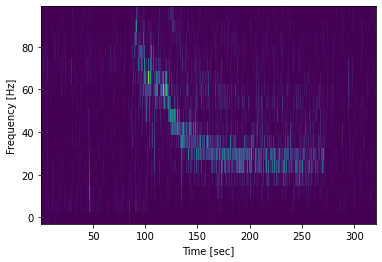

In [3]:
f, t, Sxx = signal.spectrogram(sig, fs, window='hann', nperseg=5000)

inds = np.where(f <= 100)[0]

plt.pcolormesh(t, f[inds], Sxx[inds], shading='auto')

plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.show()

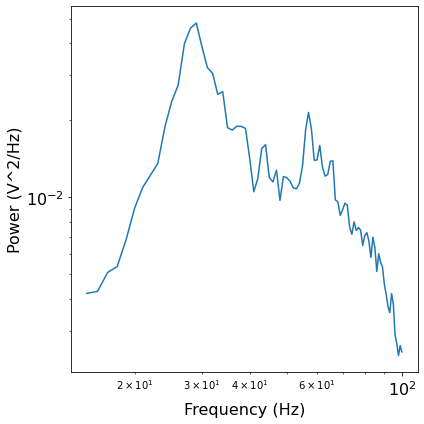

In [5]:
f_range = (15, 100)

freqs, powers = compute_spectrum(sig[int(fs * 80):int(fs * 250)], fs, f_range=f_range)

plot_power_spectra(freqs, powers)


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.00 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



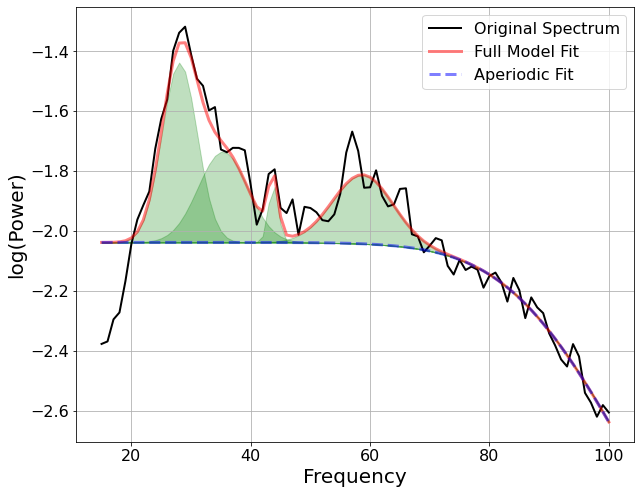

In [6]:
fm = FOOOF(aperiodic_mode='knee', max_n_peaks=4)
fm.fit(freqs, powers)
fm.plot(plot_peaks='shade', plt_log=False)

In [ ]:
#fm_re, imfs, pe_mask = refit(fm, sig, fs, f_range, power_thresh=0.1, energy_thresh=10)

#fm_re.plot(plot_peaks='shade', plt_log=True)

In [ ]:
motif = Motif(
    corr_thresh=0.8,
    var_thresh=0.01,
    min_clust_score=0.5,
    min_clusters=1,
    max_clusters=4,
    min_n_cycles=10,
    center='peak'
)

motif.fit(fm, sig, fs)

In [ ]:
motif.plot(plot_sig=False)